In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing


In [12]:
# Loading CSV data
gld_data = pd.read_csv('dataset.csv')

print(gld_data.head())#Top 5
print("====================================================");
print(gld_data.tail()) #Last 5

#Number of rows and columns.
print("The shape is : ")
print(gld_data.shape)

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
           Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033
The shape is : 
(2290, 6)


In [14]:
#Getting information about data
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
#Checking number of missing values.
gld_data.isnull().sum()
##Here there will be no missing values, if there is some missing value, you need to handle it.

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [20]:
## Getting statistical mesaures for dataa like count mean, std, min, max
gld_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
## Find correlation between variables in data set.
crln = gld_data.corr()

/tmp/ipykernel_32/2621767974.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crln = gld_data.corr()


<Axes: >

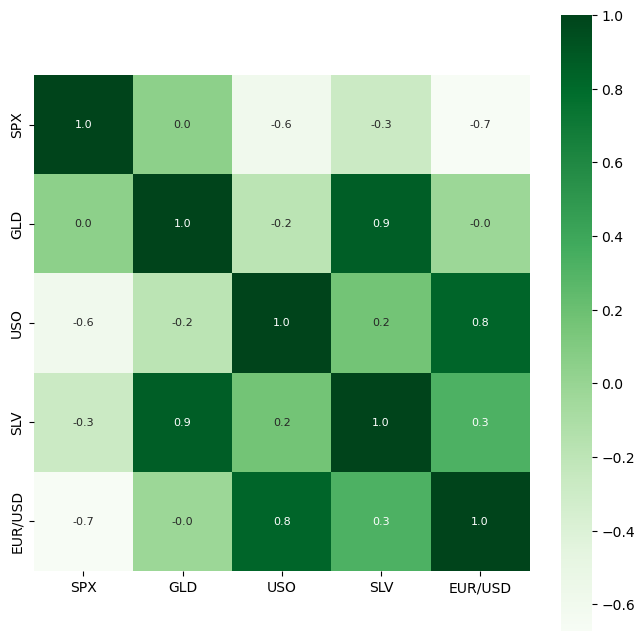

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(crln,cbar=True,square=True,fmt='.1f',annot = True,annot_kws = {'size' : 8},cmap = 'Greens')

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


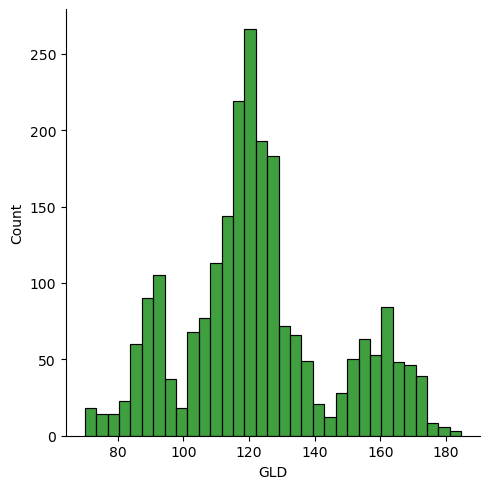

In [33]:
print(crln['GLD'])
sns.displot(gld_data['GLD'],color='green')

# Splitting Data

In [36]:
X = gld_data.drop(['Date','GLD'],axis = 1)
Y = gld_data['GLD']
print(X)
print(Y)

#Performing the Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Making the Model

In [38]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train,Y_train)

#Prediction of Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.58949969  81.88129985 116.06540003 127.66050084 120.8228009
 154.81899751 150.30549992 126.11290031 117.41509877 125.87320123
 116.51340123 171.77620086 141.25839877 167.9905986  115.37919997
 117.42350051 137.93820326 170.00670098 159.36280295 160.4532003
 155.0170005  125.52459998 175.90919962 157.15370347 125.19050034
  93.7900998   77.28320052 120.50329984 119.12029944 167.60869965
  88.1749003  125.35330064  91.28210078 117.70220019 121.19079907
 136.30440039 115.30760108 115.20730065 147.44189999 107.13560084
 104.21210263  87.07309773 126.53150021 117.96600008 153.73649906
 119.62630015 108.37959991 107.96919792  93.10390025 127.04649791
  75.05630012 113.62549918 121.29959993 111.34149947 118.85879887
 120.63039954 158.79529961 167.60390059 147.23209715  85.79029848
  94.44110017  86.79729876  90.53789989 119.04820067 126.45380084
 127.6652002  170.71060046 122.25759934 117.38449902  98.7717005
 168.68060107 143.15409858 132.44380226 121.27610205 121.00639959
 119.89390092

# Evaluating Model

In [39]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9903954056245597


# Compare in Plot

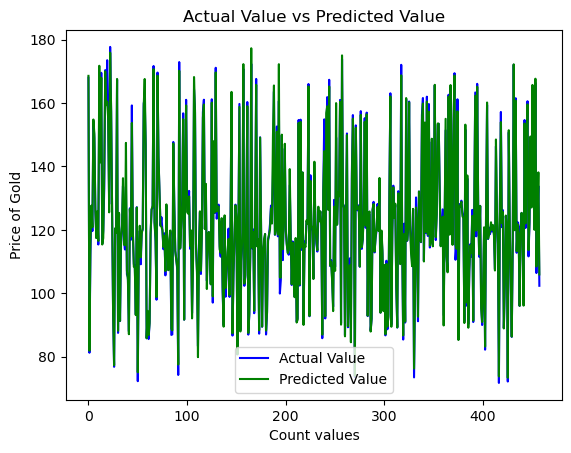

In [41]:
Y_test = list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Count values')
plt.ylabel('Price of Gold')
plt.legend()
plt.show()